In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from math import log10

from collections import Counter

In [2]:
### Load data

metabolite_array = pd.read_csv("../MCF7_removal/Metabolomics_data_noMCF7.csv")

In [36]:
metabolite_array

,1,2,3,4,5,6,7,8,9,10,...,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296
0,4.031610,3.982633,3.974696,3.987666,3.921998,3.892873,3.954146,3.962085,3.794488,3.899328,...,3.817301,3.699317,3.792532,3.900149,3.756712,4.028449,3.824971,3.787106,3.700531,3.750277
1,3.544936,3.595276,3.583879,3.634578,3.656482,3.860338,3.368845,3.529687,3.177825,3.476832,...,3.165244,3.107549,3.324488,2.582063,3.429914,3.168497,2.879096,3.024896,3.426186,3.314078
2,4.787708,4.812639,4.895511,4.895528,4.769916,4.807136,4.788550,4.793895,4.626812,4.679364,...,4.529276,4.490506,4.620812,4.635946,4.530661,4.445807,4.347740,4.495752,4.830852,4.836830
3,3.620968,3.661434,3.771881,3.695744,3.630224,3.764101,3.598900,3.790567,3.630936,3.717504,...,3.666331,3.547159,3.533772,3.736397,3.619615,3.422918,3.878292,3.711554,3.708081,3.888965
4,3.615319,3.843170,4.072875,4.050496,3.561101,3.634276,3.759668,3.814847,3.609808,3.757092,...,3.449015,3.534407,3.177825,3.453471,3.402949,3.421933,3.414639,3.035029,3.480007,3.361917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,3.439648,3.476107,3.236033,3.362482,3.412796,3.566437,3.795741,3.736476,3.599446,3.598681,...,3.134177,3.161368,3.568671,3.568436,3.487845,3.485295,3.521138,3.479719,3.206016,3.130655
1095,0.000000,0.000000,0.000000,2.222716,0.000000,0.000000,2.745855,2.910624,2.834421,2.579784,...,2.830589,2.990783,3.107210,3.131619,2.719331,2.260071,3.133219,2.938019,3.186108,3.187521
1096,3.197005,3.068557,3.016616,2.760422,3.271377,3.150449,3.426186,3.165838,3.319938,3.163161,...,1.716003,2.238046,2.578639,2.764176,2.942504,3.053078,2.257679,2.459392,2.309630,2.214844
1097,3.066699,3.022841,3.166134,3.223496,3.038620,3.061829,3.361917,3.419791,3.454235,3.277151,...,3.073718,2.995635,3.474508,3.449478,3.009876,3.068557,3.375481,3.361350,3.014521,2.906335


In [37]:
sample_data = pd.read_csv("../MCF7_removal/Celllines_mapping_manual_noMCF7.csv")

In [3]:
### Set up tissue labels

sample_data = pd.read_csv("../MCF7_removal/Celllines_mapping_manual_noMCF7.csv")
sample_data = sample_data.drop_duplicates(subset = "dsIdx")
sample_data_tissue = sample_data["DI"].tolist()
tissue_type = []

unknown_list = []
unknown_count =1

for item in sample_data_tissue:
    if pd.isnull(item):
        unknown_list.append(str(unknown_count))
        unknown_count +=1
        continue
        
    elif item == "[]":
        unknown_list.append(str(unknown_count))
        unknown_count+=1
        continue
    else:
        item = item.split(";")[2].split("'")[0].strip()
        tissue_type.append(item)
        unknown_count+=1
    tissue_origin = pd.read_excel("../../Cellosaurus_data/Cellline_tissue_origin.xlsx", names= ["Cancer", "Origin", "Layer1", "Layer2"])
tissue_origin_dict = tissue_origin.set_index("Cancer")["Origin"].to_dict()
cell_origin = [tissue_origin_dict.get(item) for item in tissue_type]
tissue_type = pd.Series(tissue_type)
cell_origin = pd.Series(cell_origin)
tissue_type = tissue_type.rename("Tissue")
cell_origin = cell_origin.rename("Tissue")

In [4]:
cell_origin

0         Lung
1         Lung
2         Lung
3         Lung
4         Lung
         ...  
1207      Lung
1208    Breast
1209    Breast
1210     Brain
1211     Brain
Name: Tissue, Length: 1212, dtype: object

In [5]:
### Make palettes

manual_palette = sns.color_palette("Set3").as_hex()[4:-1] + sns.color_palette("Set3").as_hex()[:4] + (sns.color_palette("Set2").as_hex())
manual_combined = sns.color_palette(manual_palette, n_colors = len(Counter(cell_origin))).as_hex()
palette_cmap = sns.diverging_palette(237, 8.7, s= 99, l = 50, as_cmap = True)

In [6]:
c1 = manual_combined[1]
c2 = manual_combined[2]

manual_combined[1] = c2
manual_combined[2] = c1

In [7]:
manual_combined

['#80b1d3',
 '#b3de69',
 '#fdb462',
 '#fccde5',
 '#d9d9d9',
 '#bc80bd',
 '#ccebc5',
 '#8dd3c7',
 '#ffffb3',
 '#bebada',
 '#fb8072']

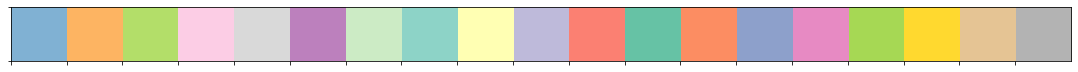

In [8]:
sns.palplot(manual_palette)

In [9]:
reordered_cells = ['Lung', 'Skin', 'Breast', 'Brain', 'Ovary', 'Blood', 'Colon',
       'Kidney', 'Pancreas', 'Prostate', 'Bladder']

In [10]:
palette  = dict(zip(reordered_cells, manual_combined))
tissue_colours = cell_origin.map(palette)

In [11]:
palette

{'Lung': '#80b1d3',
 'Skin': '#b3de69',
 'Breast': '#fdb462',
 'Brain': '#fccde5',
 'Ovary': '#d9d9d9',
 'Blood': '#bc80bd',
 'Colon': '#ccebc5',
 'Kidney': '#8dd3c7',
 'Pancreas': '#ffffb3',
 'Prostate': '#bebada',
 'Bladder': '#fb8072'}

In [12]:
metabolite_array = metabolite_array.drop(["ionIdx", "ionMz"], axis = 1)
metabolite_array = metabolite_array.drop(unknown_list, axis =1)

In [13]:
metabolite_array = np.log10(metabolite_array)
metabolite_array = metabolite_array.fillna(0)
metabolite_array = metabolite_array.replace(np.inf, 0)
metabolite_array = metabolite_array.replace(-np.inf, 0)

In [14]:
metabolite_array_colz = (metabolite_array.transpose().apply(zscore, axis =0)).transpose()
metabolite_array_rowz = metabolite_array.apply(zscore, axis = 0)

In [15]:
tissue_colours

0       #80b1d3
1       #80b1d3
2       #80b1d3
3       #80b1d3
4       #80b1d3
         ...   
1207    #80b1d3
1208    #fdb462
1209    #fdb462
1210    #fccde5
1211    #fccde5
Name: Tissue, Length: 1212, dtype: object

[]

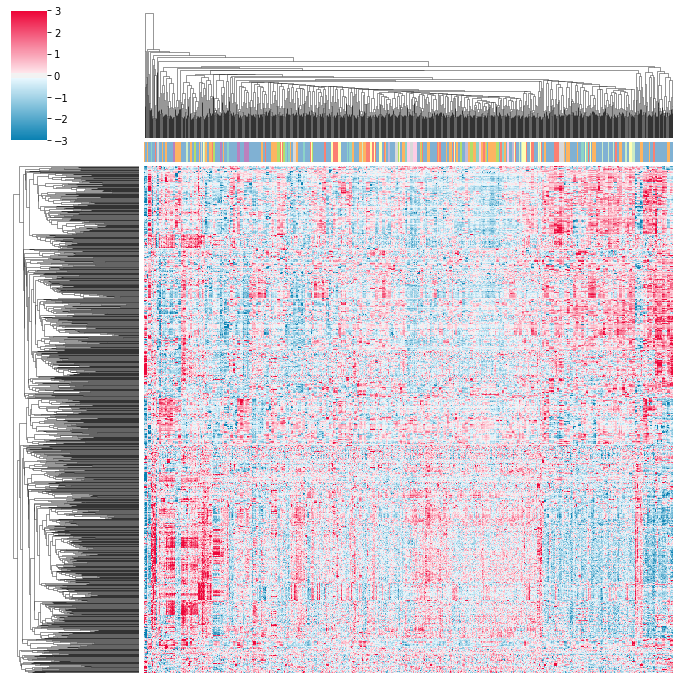

In [16]:
g = sns.clustermap(metabolite_array_colz, vmax = 3, vmin = -3, cmap = palette_cmap, col_colors=tissue_colours.values)
g.ax_heatmap.set_xticklabels([])
g.ax_heatmap.set_xticks([])

g.ax_heatmap.set_yticklabels([])
g.ax_heatmap.set_yticks([])

#g.savefig("Metabolite_expression_clustermap.png", dpi = 450)

In [17]:
columnorder = g.dendrogram_col.reordered_ind

In [23]:
for item in columnorder:
    print(str(item) + ",")

48,
49,
36,
37,
28,
29,
510,
511,
1118,
1119,
489,
488,
508,
509,
478,
479,
894,
895,
22,
23,
870,
871,
918,
919,
994,
995,
1038,
1039,
343,
1032,
582,
583,
632,
633,
152,
153,
76,
77,
84,
85,
122,
123,
82,
83,
60,
61,
140,
141,
1208,
1209,
1140,
1141,
1166,
1167,
1100,
1101,
1198,
1199,
1182,
1183,
1104,
1105,
1126,
1127,
1120,
1121,
1136,
1137,
1180,
1181,
1204,
1205,
546,
547,
462,
463,
458,
459,
386,
387,
416,
417,
418,
419,
38,
39,
44,
45,
16,
17,
8,
9,
54,
55,
10,
11,
336,
337,
338,
339,
330,
331,
42,
43,
26,
27,
310,
311,
324,
325,
14,
15,
46,
47,
52,
53,
34,
35,
20,
21,
6,
7,
12,
13,
1090,
1091,
1010,
1011,
740,
741,
622,
623,
578,
579,
964,
965,
850,
851,
998,
999,
630,
631,
600,
601,
394,
395,
404,
405,
384,
385,
420,
421,
390,
391,
408,
409,
758,
759,
319,
318,
316,
317,
320,
321,
314,
315,
308,
309,
306,
307,
326,
327,
332,
333,
96,
97,
136,
137,
90,
91,
78,
79,
108,
109,
586,
587,
590,
591,
608,
609,
612,
613,
648,
649,
646,
647,
868,
869,
534,
535,
558,
559,
434,
435,
86,

In [23]:
tissue_ordered_list = [cell_origin[i] for i in columnorder]

In [24]:
tissue_ordered_list

['Breast',
 'Breast',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Kidney',
 'Kidney',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Skin',
 'Skin',
 'Lung',
 'Lung',
 'Bladder',
 'Bladder',
 'Lung',
 'Lung',
 'Ovary',
 'Ovary',
 'Ovary',
 'Ovary',
 'Lung',
 'Lung',
 'Breast',
 'Breast',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Breast',
 'Breast',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Blood',
 'Blood',
 'Blood',
 'Blood',
 'Blood',
 'Blood',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Colon',
 'Colon',
 'Colon',
 'Colon',
 'Colon',
 'Colon',


In [30]:
import numpy as np
from itertools import groupby
import random

def changes_in(sequence):
    return len(list(groupby(sequence))) - 1

In [28]:
changes_in(tissue_ordered_list)

225

In [31]:
flip_distribution = []
for n in range(0,1000000):
    new_list = tissue_ordered_list.copy()
    random.shuffle(new_list)
    flips = changes_in(new_list)
    flip_distribution.append(flips)

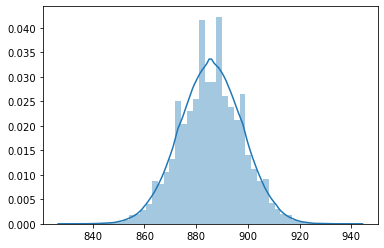

In [32]:
sns.distplot(flip_distribution)

In [34]:
pvalue =  len([1 for i in flip_distribution if i <= 225])/1000000

In [35]:
pvalue

0.0